### Récupération du dataset

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Mall_Customers.xls',index_col='CustomerID')

display(df)
df.info()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


### Gestion des doublons et des valeurs manquantes

In [2]:
# Vérifier l'absence de doublons
print(df.duplicated().sum())

# Vérifier l'absence de valeurs nulles
print(df.isna().sum())

0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### Vérification de la validité des données

Gender
Female    112
Male       88
Name: count, dtype: int64


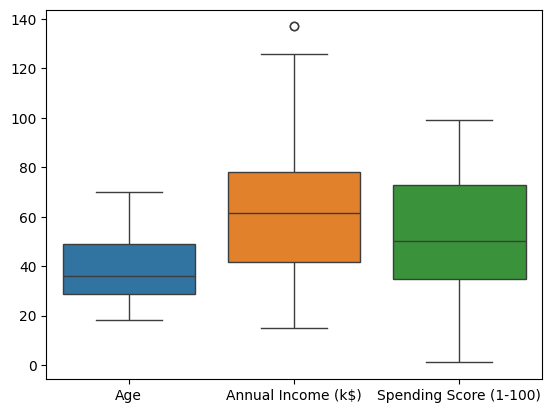

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vérifier la distribution des données qualitatives
print (df['Gender'].value_counts())

# Vérifier la distribution des données quantitatives
sns.boxplot(df.drop(['Gender'], axis=1))
plt.show()
# Les données semblent cohérentes

### Analyse des relations entre les données

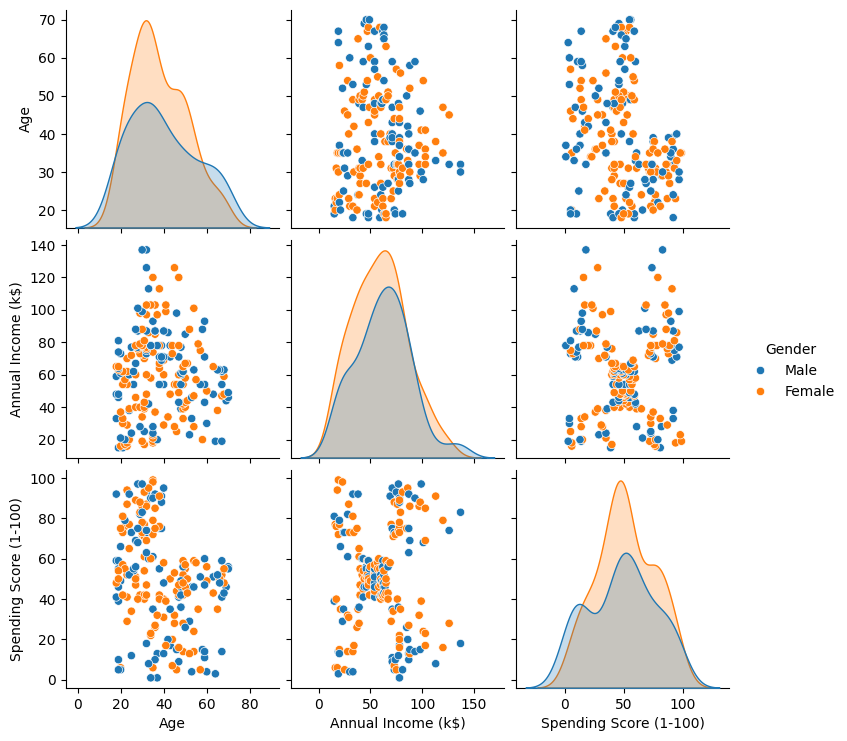

In [5]:
# On trace un pairplot des variables numériques en catégorisant suivant le genre
sns.pairplot(df,hue='Gender')

# Age et Spending Score semblent bien se prêter à la clusterisation

### Dendogramme

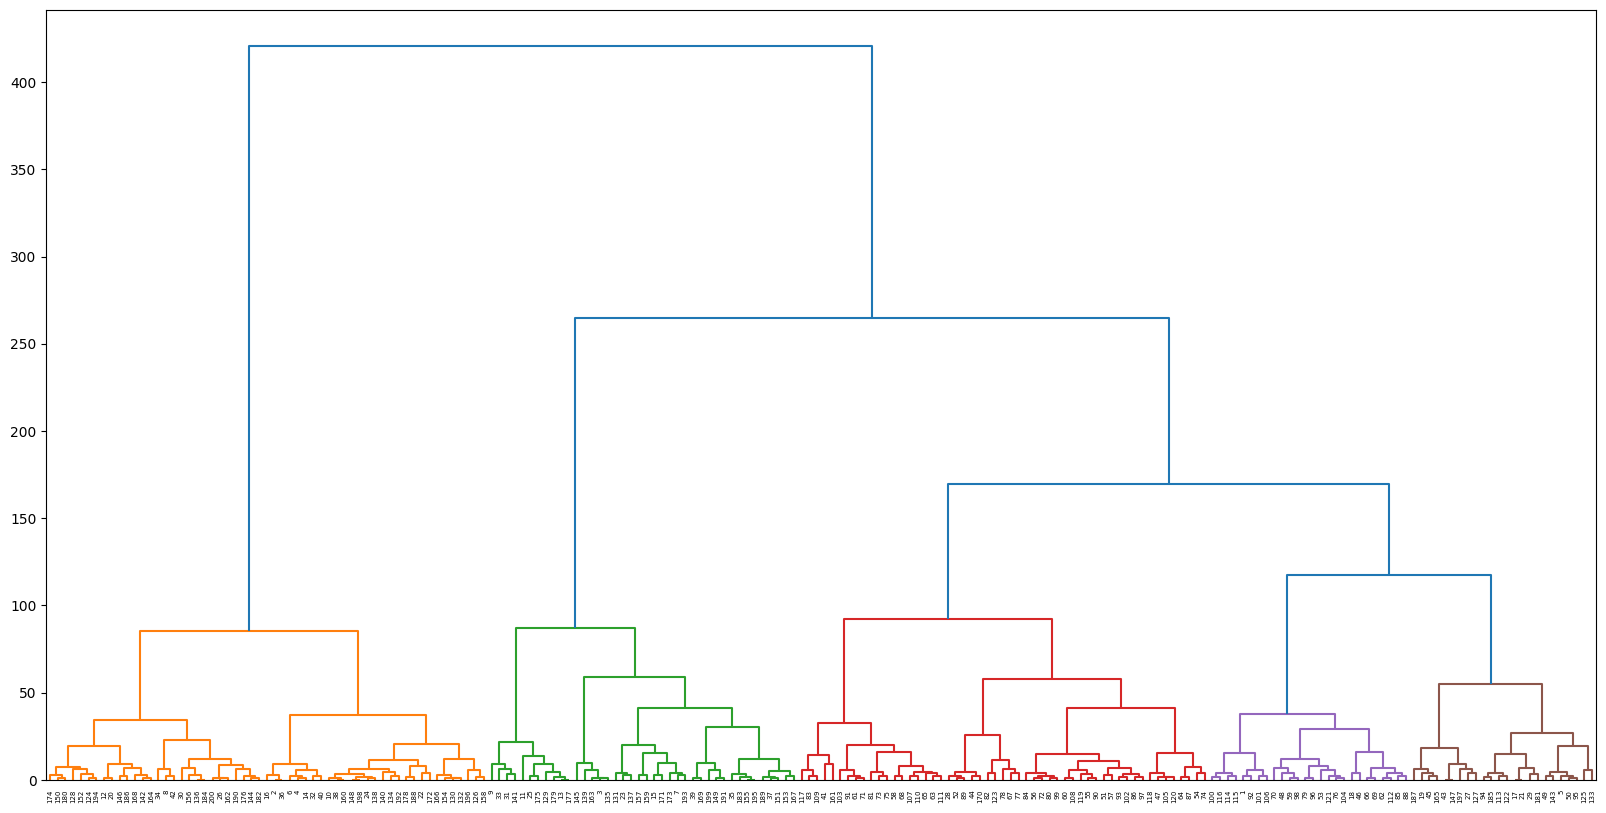

In [ ]:
df_cah = df[['Age','Spending Score (1-100)']]

from scipy.cluster.hierarchy import linkage,dendrogram
Z = linkage(df_cah, method = 'ward', metric = 'euclidean')

plt.figure(figsize=(20,10))
dendrogram(Z, labels = df_cah.index, leaf_rotation = 90., color_threshold = 100)
plt.show()

# D'après le dendogramme, le nbre de clusters optimal est 2 (les labels oranges d'un côté, le reste de l'autre)

### Graphique des coeffs de silhouette

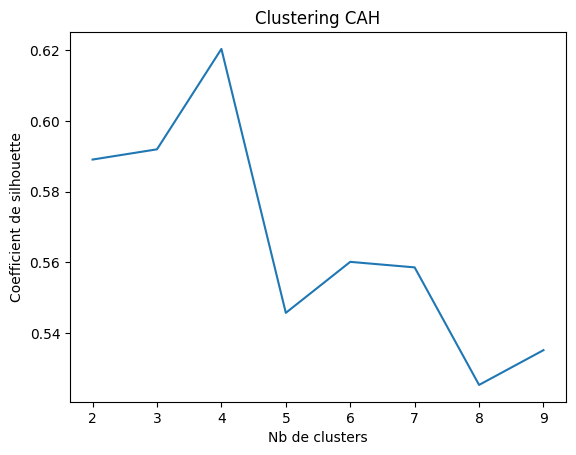

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

coeffs_sil = []
for k in range(2,10):
    cah = AgglomerativeClustering(n_clusters=k)
    cah.fit(df_cah)
    coeffs_sil.append(silhouette_score(df_cah,cah.labels_,metric='sqeuclidean'))

plt.plot(np.arange(2,10),coeffs_sil)
plt.xlabel("Nb de clusters")
plt.ylabel("Coefficient de silhouette")
plt.title("Clustering CAH")
plt.show()

### Entraînement du modèle CAH

In [10]:
# on va utiliser 4 clusters
cah = AgglomerativeClustering(4)
cah.fit(df_cah)

# Calcul des labels
print (cah.labels_)

[0 3 2 3 0 3 2 3 2 3 2 3 2 3 2 3 0 0 0 3 0 3 2 3 2 3 0 1 0 3 2 3 2 3 2 3 2
 3 2 3 1 3 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 1 3 0 3 0 3 2 3 2 3 0 3 2 3 2 3 2 3 2 3 0 3 2 3 0 3
 2 3 2 3 2 3 2 3 2 3 2 3 1 3 2 3 0 3 2 3 2 1 2 3 2 3 2 3 2 3 2 3 0 3 2 3 0
 3 0 3 2 3 2 3 2 3 2 3 0 3 2 3]


### Visualisation des clusters

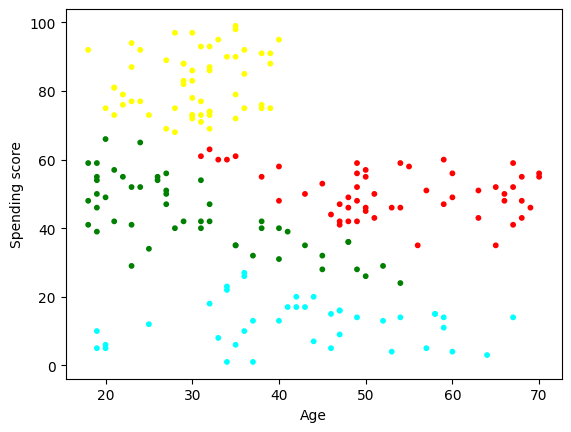

In [12]:
# Liste des couleurs
colors = ["green","red","cyan","yellow"]

plt.scatter(df_cah['Age'], df_cah['Spending Score (1-100)'], s=10, c=[colors[label] for label in cah.labels_])
plt.xlabel("Age")
plt.ylabel("Spending score")
plt.show()